## Dollar Cost Average Investment Strategy vs Lump Sum Investment Strategy 

In [1]:
# Decription: Dollar cost average vs lump sum

In [20]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
plt.style.use('fivethirtyeight')

In [22]:
enddate = dt.datetime.strptime('2022-02-10', '%Y-%m-%d')
startdate = enddate - dt.timedelta(3650+3)

asset = yf.download('SPY', startdate, enddate)
# asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))  # set date column as index
asset

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-10,134.160004,134.470001,133.839996,134.360001,107.202599,167907500
2012-02-13,135.320007,135.520004,134.740005,135.360001,108.000481,115841900
2012-02-14,135.000000,135.270004,134.250000,135.190002,107.864838,165329500
2012-02-15,135.630005,135.830002,134.289993,134.559998,107.362152,195195100
2012-02-16,134.570007,136.169998,134.330002,136.050003,108.551003,186567800
...,...,...,...,...,...,...
2022-02-03,450.950012,452.970001,445.709991,446.600006,431.550140,118024400
2022-02-04,446.350006,452.779999,443.829987,448.700012,433.579376,118454400
2022-02-07,449.510010,450.989990,445.850006,447.260010,432.187927,84472900


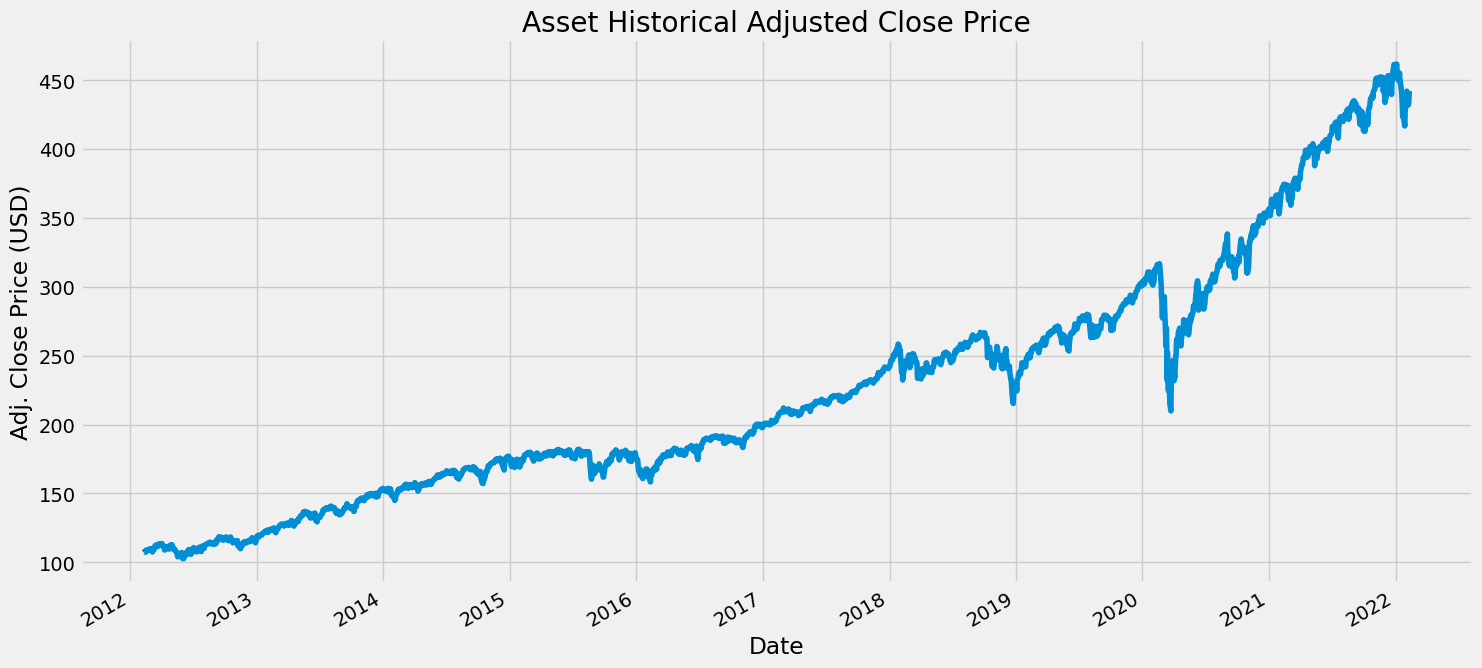

In [24]:
#Visually show the adj close price historical data
asset['Adj Close'].plot(figsize=(16,8))
plt.title('Asset Historical Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price (USD)')
plt.show()

In [25]:
# Calculate and show the lump sum investment strategy 
# Get the adjusted close prices from the dataset
adj_close_prices = asset['Adj Close']
# Choose the initial investment amount
initial_investment = 5000
# Get the latest or last price value of the stock/ETF within this data set
stock_latest_value = adj_close_prices[-1]
# Get the number of shares bought on each date with the hypothetical investment amount (aka lump sum)
num_shares_bought = initial_investment / adj_close_prices
# Calculate how much money I or you would have according to the last price in this dataset for investing 
#a lump sum on a given date in the past
lump_sum = stock_latest_value * num_shares_bought
# show the data
lump_sum

/tmp/ipykernel_6206/3245221478.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_latest_value = adj_close_prices[-1]


Date
2012-02-10    20620.836894
2012-02-13    20468.495015
2012-02-14    20494.234711
2012-02-15    20590.191763
2012-02-16    20364.688016
                  ...     
2022-02-03     5122.480780
2022-02-04     5098.506574
2022-02-07     5114.921451
2022-02-08     5073.179826
2022-02-09     5000.000000
Name: Adj Close, Length: 2517, dtype: float64

In [29]:
# Compute and show the best and worst day for a lump sum investment
print("Lump Sum investments: ")
print("The best day to invest a $" + str(initial_investment) + ' lump sum on ' + lump_sum.idxmax().strftime('%b %d %Y') + ' and would be worth $' + str(round(lump_sum.max(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))
print("The worst day to invest a $" + str(initial_investment) + ' lump sum on ' + lump_sum.idxmin().strftime('%b %d %Y') + ' and would be worth $' + str(round(lump_sum.min(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))

Lump Sum investments: 
The best day to invest a $5000 lump sum on Jun 04 2012 and would be worth $21534.17 on Feb 09 2022
The worst day to invest a $5000 lump sum on Jan 03 2022 and would be worth $4788.89 on Feb 09 2022


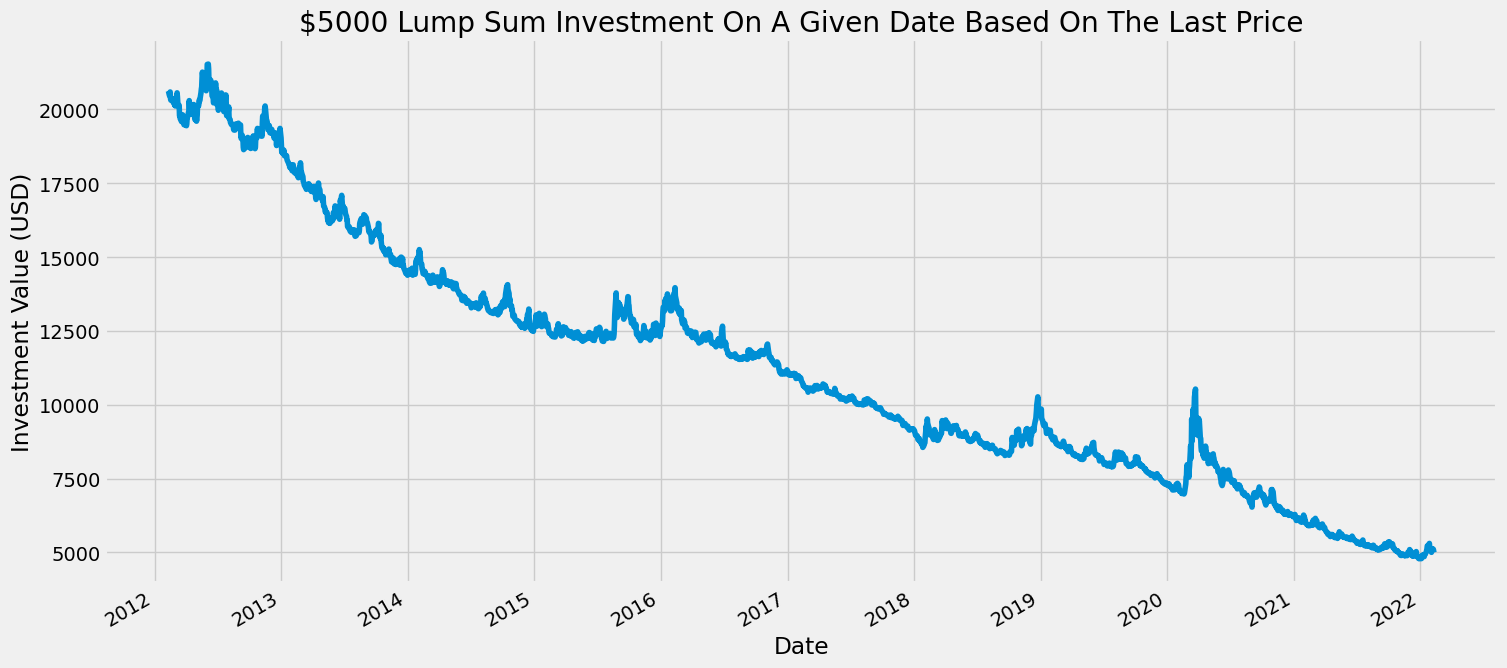

In [32]:
# Plot the lump sum data
lump_sum.plot(figsize=(16,8))
plt.title('$' + str(initial_investment) + " Lump Sum Investment On A Given Date Based On The Last Price")
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.show()

In [35]:
# Create a function to calculate the dollar cost averaging strategy 
def DCA(start_date, initial_investment):
    # Get the investment periods which will be 12 
    investment_date_periods = 12.0
    
    # Calculate the portion or amount that we plan to invest for each investment date period
    investment_portion = initial_investment / investment_date_periods
    
    # Get the dates of the investment periods 
    all_investment_dates = pd.date_range(start_date, periods=investment_date_periods, freq='30D')

    # Get the dates up to the last date in our dataset 
    investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]

    # Get the indices (and in turn the dates) within the data set that are closest to the investment dates
    closest_investment_dates = asset.index.searchsorted(investment_dates)

    # Get a list of stock prices at the closest investment date
    stock_prices = asset['Adj Close'][closest_investment_dates]

    # Get the total number of shares that we invested in by summing all of the shares purchased on each of the investment dates
    total_shares_invested = sum(investment_portion / stock_prices)

    # Get the cash that was not invested from the intial investment amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

    # Calculate the total 
    total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested

    return total 

In [36]:
# Execute the DCA function
DCA_List = []
for date in asset.index:
    DCA_List.append(DCA(date, initial_investment))

/tmp/ipykernel_6206/369202716.py:10: FutureWarning: Non-integer 'periods' in pd.date_range, pd.timedelta_range, pd.period_range, and pd.interval_range are deprecated and will raise in a future version.
  all_investment_dates = pd.date_range(start_date, periods=investment_date_periods, freq='30D')
/tmp/ipykernel_6206/369202716.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_prices = asset['Adj Close'][closest_investment_dates]
/tmp/ipykernel_6206/369202716.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested


In [39]:
# Convert the list to a series 
# Create a new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List
# SEt the date as the index
dca = dca.set_index(pd.DatetimeIndex(asset.index))
# Convert the dataframe to a series
dca = dca.squeeze()
# Show the data
dca

Date
2012-02-10    19732.500233
2012-02-13    19789.451841
2012-02-14    19755.502600
2012-02-15    19733.782699
2012-02-16    19659.957642
                  ...     
2022-02-03     5010.206732
2022-02-04     5008.208881
2022-02-07     5009.576788
2022-02-08     5006.098319
2022-02-09     5000.000000
Name: DCA, Length: 2517, dtype: float64

In [41]:
# Compute and show the best and worst day for a lump sum investment
print("DCA Investments: ")
print("The best day to start DCAing a $" + str(initial_investment) + ' invesment was on ' + dca.idxmax().strftime('%b %d %Y') + ' and would be worth $' + str(round(dca.max(),2)) + ' on ' + dca.last_valid_index().strftime('%b %d %Y'))
print("The worst day to start DCAing a $" + str(initial_investment) + ' invesment was on ' + dca.idxmin().strftime('%b %d %Y') + ' and would be worth $' + str(round(dca.min(),2)) + ' on ' + dca.last_valid_index().strftime('%b %d %Y'))

DCA Investments: 
The best day to start DCAing a $5000 invesment was on Feb 13 2012 and would be worth $19789.45 on Feb 09 2022
The worst day to start DCAing a $5000 invesment was on Nov 12 2021 and would be worth $4975.3 on Feb 09 2022


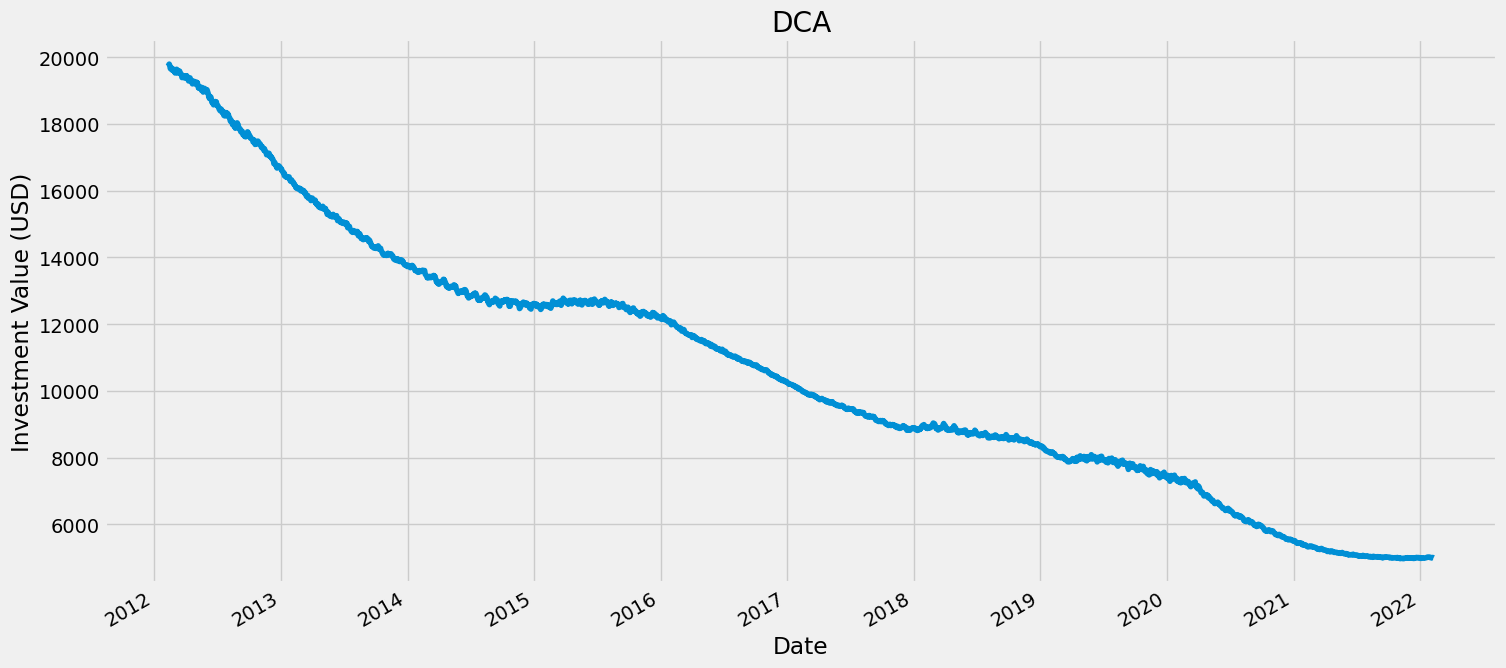

In [42]:
# Plot DCA 
dca.plot(figsize=(16,8))
plt.title('$' + str(initial_investment) + " DCA Investment On A Given Date Based On The Last Price")
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.show()

In [44]:
# Get the volatility 
lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()

print("Lump Sum volatility:", lump_sum_vol)
print('DCA Volatility', dca_vol)

Lump Sum volatility: 0.010299426150841196
DCA Volatility 0.0031226216659755827


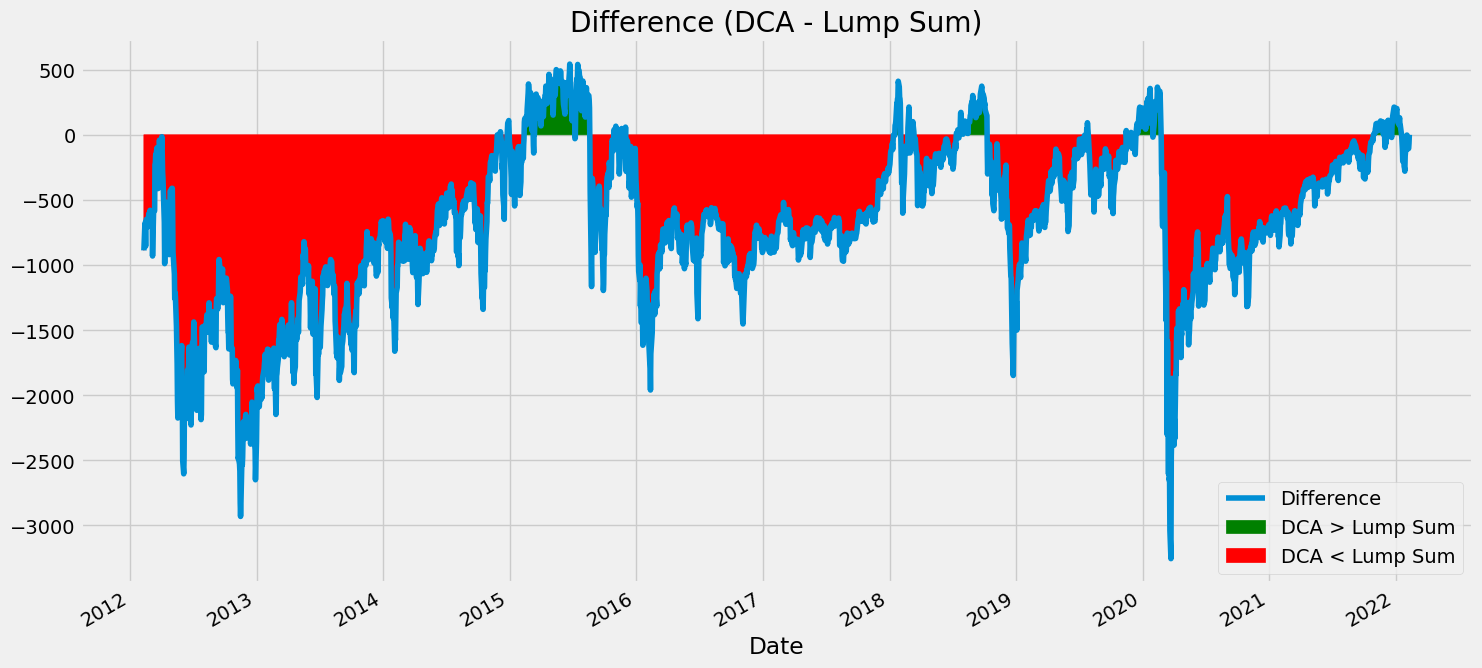

In [45]:
# Get the difference between the two
difference = dca - lump_sum
# plot the difference
difference.plot(figsize=(16,8), label='Difference')
plt.fill_between(difference.index, y1 = difference, y2=0, color='green', where = difference>0, label='DCA > Lump Sum')
plt.fill_between(difference.index, y1 = difference, y2=0, color='red', where = difference<0, label='DCA < Lump Sum')
plt.title('Difference (DCA - Lump Sum)')
plt.legend()
plt.show()

In [48]:
#Calculate the win percentages
lump_sum_win_percentage = round(sum(difference < 0)/ len(difference) * 100, 1)
dca_win_percentage = round(sum(difference > 0)/ len(difference) * 100, 1)

print("Lump Sum Investment Strategy returned more than dca:", str(lump_sum_win_percentage)+'% of the time.')
print("Dollar Cost Averaging Strategy returned more than lump sum:", str(dca_win_percentage)+'% of the time.')

Lump Sum Investment Strategy returned more than dca: 87.1% of the time.
Dollar Cost Averaging Strategy returned more than lump sum: 12.9% of the time.
